In [54]:
import numpy as np  # For numerical computations
import pandas as pd  # For handling datasets
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler  # For scaling data
from sklearn.metrics import silhouette_score  # For evaluating clustering performance
from sklearn.decomposition import PCA  # Optional, for dimensionality reduction

In [55]:
df = pd.read_csv('https://github.com/Kishan-Prakash/ML_CDAC/raw/refs/heads/main/Datasets/simp_clust.csv', index_col=0)
df.head()

,X1,X2
Name,,
A,23,150
B,24,167
C,67,256
D,65,240
E,12,102


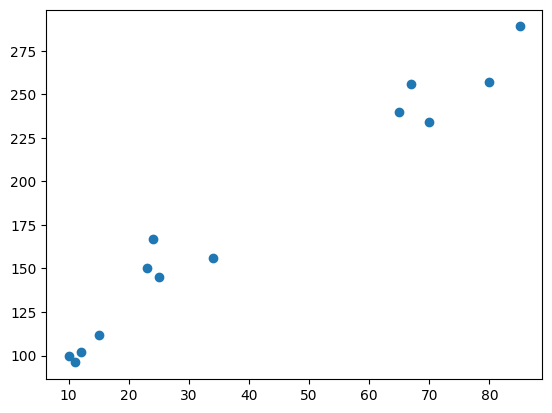

In [56]:
plt.scatter(df['X1'], df['X2'])
plt.show()

In [57]:
df = pd.read_csv('https://github.com/Kishan-Prakash/ML_CDAC/raw/refs/heads/main/Datasets/milk.csv', index_col=0)
df.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


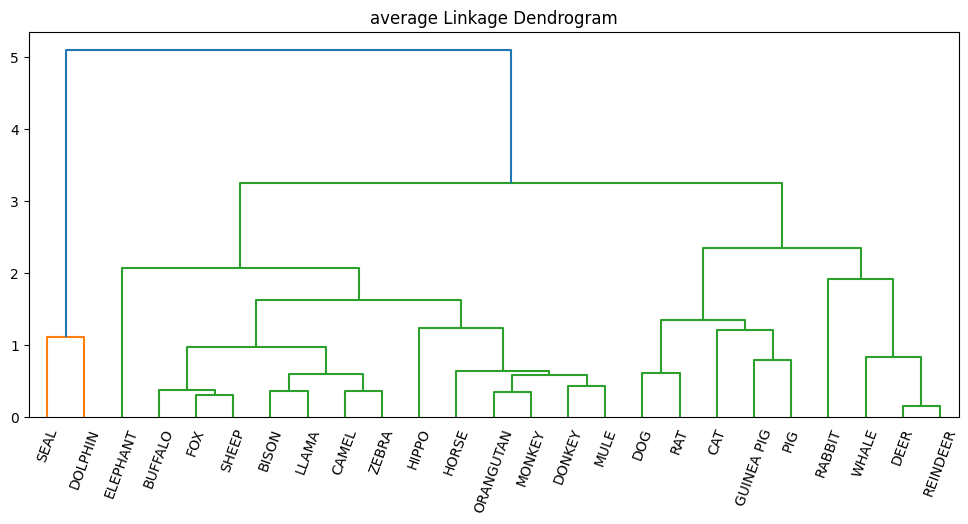

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

link = "average"

plt.figure(figsize=(12, 5))
mergings = linkage(df_scaled, method=link)
dendrogram(mergings, labels=list(df.index))
plt.title(link + " Linkage" + " Dendrogram")
plt.xticks(rotation=70)
plt.show()

In [59]:
clust = AgglomerativeClustering(n_clusters=2, linkage=link)

clust.fit(df_scaled)

silhouette_score(df_scaled, clust.labels_)

np.float64(0.5186847578981009)

In [60]:
ks = [2, 3, 4, 5, 6, 7, 8]

linkage = ['average', 'single', 'complete', 'ward']

score = []

for k in ks:
  for l in linkage:
    clust = AgglomerativeClustering(n_clusters=k, linkage=l)
    clust.fit(df_scaled)
    score.append([k, l, silhouette_score(df_scaled, clust.labels_)])

df_score = pd.DataFrame(score, columns=['Clusters','Linkage','Score'])
df_score.sort_values(by='Score', ascending=False)

,Clusters,Linkage,Score
7,3,ward,0.539160
3,2,ward,0.525851
1,2,single,0.518685
0,2,average,0.518685
6,3,complete,0.487576
4,3,average,0.487576
2,2,complete,0.455789
11,4,ward,0.443481
18,6,complete,0.419614
10,4,complete,0.416015


In [61]:
clust = KMeans(n_clusters=2)

clust.fit(df_scaled)

silhouette_score(df_scaled, clust.labels_)

np.float64(0.5258508931703421)

In [62]:
Ks = [2, 3, 4, 5, 6, 7, 8]

score = []

for k in Ks:
  clust = KMeans(n_clusters=k, random_state=25)
  clust.fit(df_scaled)
  score.append([k, silhouette_score(df_scaled, clust.labels_)])

df_score = pd.DataFrame(score, columns=['Clusters','Score'])
df_score.sort_values(by='Score', ascending=False)

,Clusters,Score
0,2,0.525851
2,4,0.423246
4,6,0.412161
3,5,0.399843
5,7,0.398780
6,8,0.397209
1,3,0.353503


In [63]:
clust = KMeans(n_clusters=2)

clust.fit(df_scaled)

df['Cluster'] = clust.labels_
df.sort_values(by='Cluster')

,water,protein,fat,lactose,ash,Cluster
Animal,,,,,,
DOLPHIN,44.9,10.6,34.9,0.9,0.53,0
SEAL,46.4,9.7,42.0,0.0,0.85,0
REINDEER,64.8,10.7,20.3,2.5,1.40,0
WHALE,64.8,11.1,21.2,1.6,1.70,0
DEER,65.9,10.4,19.7,2.6,1.40,0
RAT,72.5,9.2,12.6,3.3,1.40,0
RABBIT,71.3,12.3,13.1,1.9,2.30,0
DOG,76.3,9.3,9.5,3.0,1.20,0
HORSE,90.1,2.6,1.0,6.9,0.35,1


In [64]:
df.groupby('Cluster').mean()

,water,protein,fat,lactose,ash
Cluster,,,,,
0,63.362500,10.412500,21.662500,1.975000,1.347500
1,85.158824,4.235294,4.964706,5.147059,0.635294


In [65]:
df = pd.read_csv('https://github.com/Kishan-Prakash/ML_CDAC/raw/refs/heads/main/Datasets/nutrient.csv', index_col=0)
df.head()

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7


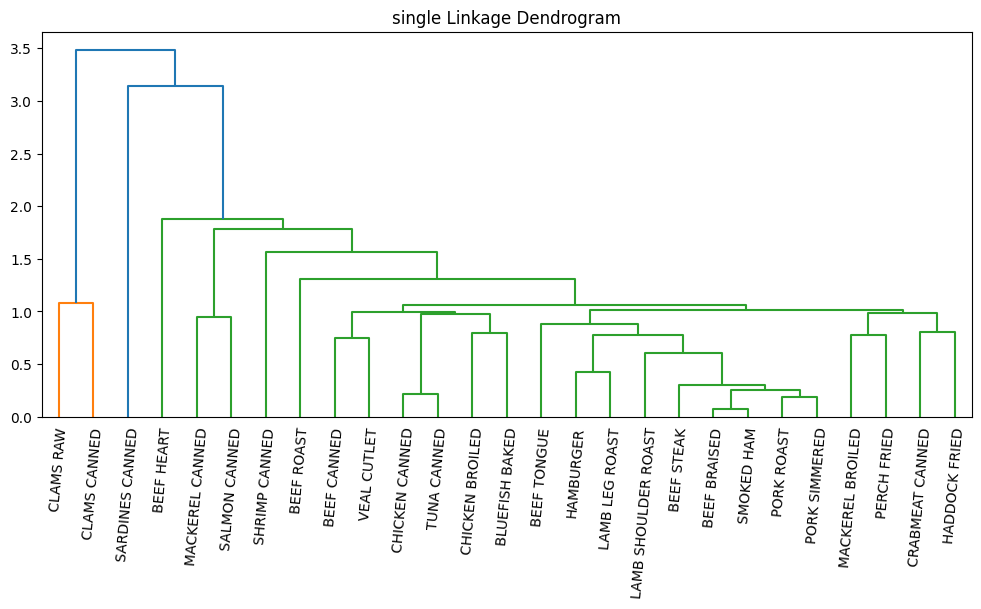

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

link = "single"

plt.figure(figsize=(12, 5))
mergings = linkage(df_scaled, method=link)
dendrogram(mergings, labels=list(df.index))
plt.title(link + " Linkage" + " Dendrogram")
plt.xticks(rotation=85)
plt.show()

In [67]:
ks = [2, 3, 4, 5, 6, 7, 8]

linkage = ['average', 'single', 'complete', 'ward']

score = []

for k in ks:
  for l in linkage:
    clust = AgglomerativeClustering(n_clusters=k, linkage=l)
    clust.fit(df_scaled)
    score.append([k, l, silhouette_score(df_scaled, clust.labels_)])

df_score = pd.DataFrame(score, columns=['Clusters','Linkage','Score'])
df_score.sort_values(by='Score', ascending=False)

,Clusters,Linkage,Score
1,2,single,0.448342
4,3,average,0.445319
5,3,single,0.445319
10,4,complete,0.415801
11,4,ward,0.415801
0,2,average,0.413451
26,8,complete,0.404794
24,8,average,0.404794
7,3,ward,0.403730
6,3,complete,0.403730


In [68]:
Ks = [2, 3, 4, 5, 6, 7, 8]

score = []

for k in Ks:
  clust = KMeans(n_clusters=k, random_state=25)
  clust.fit(df_scaled)
  score.append([k, silhouette_score(df_scaled, clust.labels_)])

df_score = pd.DataFrame(score, columns=['Clusters','Score'])
df_score.sort_values(by='Score', ascending=False)

,Clusters,Score
2,4,0.419974
5,7,0.402943
4,6,0.381370
3,5,0.378018
6,8,0.377523
1,3,0.357822
0,2,0.325778


In [71]:
df = pd.read_csv('/content/ecom_data_rfm.csv', index_col="CustomerID")
df.head()

,Unnamed: 0,Frequency,Recency,Monetary,rankR,rankF,rankM,groupRFM,Country,Customer_Segment
CustomerID,,,,,,,,,,
12346,1,2,358,2.08,2,1,1,211,United Kingdom,Lost Lowest
12347,2,182,35,481.21,5,4,3,543,Iceland,Loyal Customers
12348,3,31,108,178.71,5,1,2,512,Finland,Potential Loyalist
12349,4,73,51,605.10,5,2,4,524,Italy,Recent High Spender
12350,5,17,343,65.30,2,1,1,211,Norway,Lost Lowest


In [83]:
df = df[['Frequency', 'Recency', 'Monetary']]

df.head()

,Frequency,Recency,Monetary
CustomerID,,,
12346,2,358,2.08
12347,182,35,481.21
12348,31,108,178.71
12349,73,51,605.10
12350,17,343,65.30


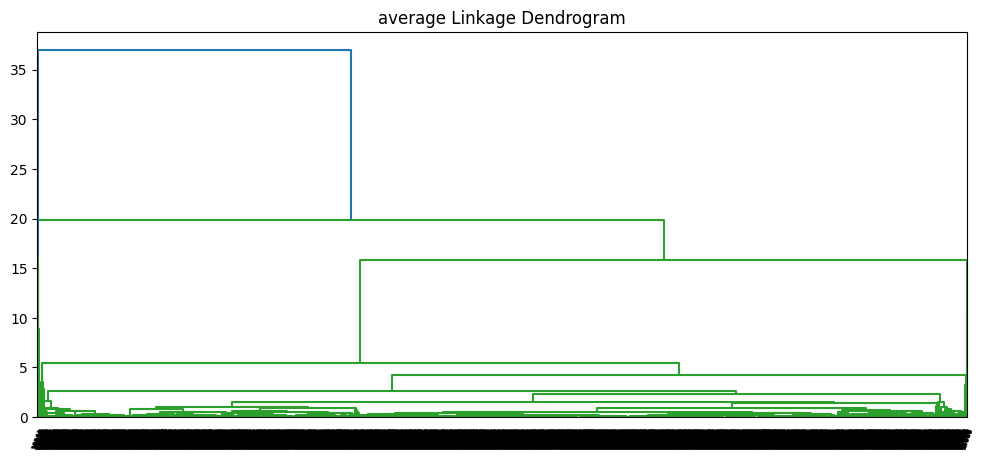

In [84]:
from scipy.cluster.hierarchy import dendrogram, linkage

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

link = "average"

plt.figure(figsize=(12, 5))
mergings = linkage(df_scaled, method=link)
dendrogram(mergings, labels=list(df.index))
plt.title(link + " Linkage" + " Dendrogram")
plt.xticks(rotation=70)
plt.show()

In [85]:
Ks = [2, 3, 4, 5, 6, 7, 8]

score = []

for k in Ks:
  clust = KMeans(n_clusters=k, random_state=25)
  clust.fit(df_scaled)
  score.append([k, silhouette_score(df_scaled, clust.labels_)])

df_score = pd.DataFrame(score, columns=['Clusters','Score'])
df_score.sort_values(by='Score', ascending=False)

,Clusters,Score
0,2,0.957237
2,4,0.626397
3,5,0.621717
1,3,0.599820
4,6,0.572702
5,7,0.537457
6,8,0.515597


In [86]:
clust = KMeans(n_clusters=2)

clust.fit(df_scaled)

df['Cluster'] = clust.labels_
df.sort_values(by='Cluster')

,Frequency,Recency,Monetary,Cluster
CustomerID,,,,
16275,33,229,144.77,0
16287,8,202,17.90,0
16284,109,64,230.91,0
16283,168,38,406.15,0
16282,11,372,30.05,0
...,...,...,...,...
14911,5903,34,31060.66,1
12748,4642,33,15115.60,1
14096,5128,37,41376.33,1


In [87]:
df.groupby('Cluster').mean()

,Frequency,Recency,Monetary
Cluster,,,
0,87.792914,124.563886,288.755996
1,4732.200000,70.600000,29632.934000


In [93]:
df = pd.read_csv('/content/ecom_data_rfm.csv', index_col="CustomerID")

df = df[['Frequency', 'Recency', 'Monetary']]

df.head()

,Frequency,Recency,Monetary
CustomerID,,,
12346,2,358,2.08
12347,182,35,481.21
12348,31,108,178.71
12349,73,51,605.10
12350,17,343,65.30


In [94]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [98]:
clust = AgglomerativeClustering(n_clusters=2, linkage="average")

clust.fit(df_scaled)

silhouette_score(df_scaled, clust.labels_)

np.float64(0.9614131474015833)

In [99]:
df['Cluster'] = clust.labels_
df.sort_values(by='Cluster')

,Frequency,Recency,Monetary,Cluster
CustomerID,,,,
16275,33,229,144.77,0
16287,8,202,17.90,0
16284,109,64,230.91,0
16283,168,38,406.15,0
16282,11,372,30.05,0
...,...,...,...,...
14298,1640,36,2455.50,0
14297,64,50,156.57,0
14096,5128,37,41376.33,1


In [100]:
df.groupby('Cluster').mean()

,Frequency,Recency,Monetary
Cluster,,,
0,88.814485,124.563628,301.279868
1,6338.000000,35.000000,30923.390000


In [101]:
df = pd.read_csv('https://github.com/Kishan-Prakash/ML_CDAC/raw/refs/heads/main/Datasets/milk.csv', index_col=0)
df.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [106]:
from sklearn.cluster import DBSCAN

scaler = StandardScaler().set_output(transform='pandas')

df_scaled = scaler.fit_transform(df)

clust = DBSCAN(eps=1, min_samples=2)

clust.fit(df_scaled)


DBSCAN(eps=1, min_samples=2)

In [107]:
clust.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,
       -1, -1,  1,  2,  2,  2, -1, -1])

In [108]:
df_scaled['Clust'] = clust.labels_

df_scaled

,water,protein,fat,lactose,ash,Clust
Animal,,,,,,
HORSE,0.948806,-1.009291,-0.903208,1.542217,-1.037554,0
ORANGUTAN,0.821407,-1.344603,-0.660619,1.040773,-1.259945,0
MONKEY,0.813445,-1.121062,-0.738247,1.263637,-1.381249,0
DONKEY,0.964731,-1.260775,-0.864394,1.152205,-0.936467,0
HIPPO,0.972694,-1.568145,-0.563583,0.149319,-1.542988,0
CAMEL,0.757707,-0.757806,-0.670322,0.372182,-0.309730,0
BISON,0.694008,-0.394551,-0.835283,0.873626,0.074400,0
BUFFALO,0.311810,-0.087181,-0.233662,0.316466,-0.168208,0
GUINEA PIG,0.295885,0.331959,-0.301587,-0.797852,-0.026687,0


In [109]:
df_scaled_inliner = df_scaled[df_scaled['Clust'] != -1]

silhouette_score(df_scaled_inliner.iloc[:,:-1], df_scaled_inliner.iloc[:, -1])

np.float64(0.4344818095328392)

In [112]:
eps = np.linspace(0.01, 1.5, 10)

min_pts = [2, 3, 4, 5, 6]

score = []

for e in eps:

  for m in min_pts:

    clust = DBSCAN(eps=e, min_samples=m)

    clust.fit(df_scaled)

    df_scaled['Clust'] = clust.labels_

    df_scaled_inliner = df_scaled[df_scaled['Clust'] != -1]

    # Check if df_scaled_inliner has at least 2 unique labels before calculating silhouette score
    if df_scaled_inliner.shape[0] > 0 and len(np.unique(df_scaled_inliner['Clust'])) >= 2:
      score.append([e, m, silhouette_score(df_scaled_inliner.iloc[:,:-1], df_scaled_inliner.iloc[:, -1])])
    else:
      # Handle the case where all points are noise or only one cluster, e.g., assign a low score
      score.append([e, m, -1])

df_score = pd.DataFrame(score, columns=['Eps','MinPts','Score'])
df_score.sort_values(by='Score', ascending=False)

,Eps,MinPts,Score
10,0.341111,2,0.903367
37,1.168889,4,0.619028
15,0.506667,2,0.593446
20,0.672222,2,0.574846
40,1.334444,2,0.556995
45,1.500000,2,0.552889
35,1.168889,2,0.552629
22,0.672222,4,0.551975
36,1.168889,3,0.551898
16,0.506667,3,0.534443


In [114]:
eps = np.linspace(0.01, 1.5, 10)

min_pts = [2, 3, 4, 5, 6]

count = 0

score = []

for e in eps:

  for m in min_pts:

    clust = DBSCAN(eps=e, min_samples=m)

    clust.fit(df_scaled.iloc[:,:5])

    if len(set(clust.labels_)) > 2:

      count = count + 1

      df_scaled['Clust'] = clust.labels_

      df_scaled_inliner = df_scaled[df_scaled['Clust'] != -1]

      sil_sc = silhouette_score(df_scaled_inliner.iloc[:,:-1], df_scaled_inliner.iloc[:, -1])

      score.append([count,e, m, sil_sc])

df_score = pd.DataFrame(score, columns=['Count','Eps','MinPts','Score'])
df_score.sort_values(by='Score', ascending=False)

,Count,Eps,MinPts,Score
0,1,0.341111,2,0.903367
11,12,1.003333,3,0.647387
1,2,0.506667,2,0.593446
4,5,0.672222,2,0.574846
13,14,1.334444,2,0.552889
14,15,1.500000,2,0.552889
12,13,1.168889,2,0.552889
6,7,0.672222,4,0.551975
2,3,0.506667,3,0.534443
5,6,0.672222,3,0.534443


In [115]:
df = pd.read_csv('https://github.com/Kishan-Prakash/ML_CDAC/raw/refs/heads/main/Datasets/milk.csv', index_col=0)
df.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [133]:
sc = StandardScaler()

df_scaled = sc.fit_transform(df)

pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

df_pca.head()

,PC1,PC2
0,2.435175,-0.231478
1,2.258736,-0.693148
2,2.335861,-0.663328
3,2.318677,-0.273815
4,2.060294,-1.019199


In [134]:
k_clust = KMeans(n_clusters=2)

k_clust.fit(df_pca)

KMeans(n_clusters=2)

In [135]:
df_pca['Cluster'] = k_clust.labels_

df_pca['Cluster'] = df_pca['Cluster'].astype(str)

df_pca

,PC1,PC2,Cluster
0,2.435175,-0.231478,0
1,2.258736,-0.693148,0
2,2.335861,-0.663328,0
3,2.318677,-0.273815,0
4,2.060294,-1.019199,0
5,1.301536,0.137303,0
6,1.282742,0.622667,0
7,0.505068,0.088235,0
8,-0.255502,0.287373,0
9,-0.051008,0.470136,0


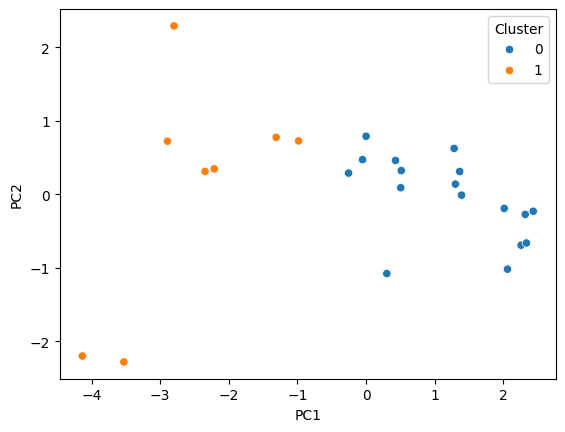

In [136]:
import seaborn as sns
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca)
plt.show()

In [138]:
df = pd.read_csv('https://github.com/Kishan-Prakash/ML_CDAC/raw/refs/heads/main/Glass%20Identification/Glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [139]:
X, y = df.drop('Type', axis=1), df['Type']

In [144]:
scaler = StandardScaler().set_output(transform='pandas')

df_scaled = scaler.fit_transform(X)

In [145]:
eps = np.linspace(0.01, 1.5, 10)

min_pts = [2, 3, 4, 5, 6]

score = []

for e in eps:

  for m in min_pts:

    clust = DBSCAN(eps=e, min_samples=m)

    clust.fit(df_scaled)

    df_scaled['Clust'] = clust.labels_

    df_scaled_inliner = df_scaled[df_scaled['Clust'] != -1]

    # Check if df_scaled_inliner has at least 2 unique labels before calculating silhouette score
    if df_scaled_inliner.shape[0] > 0 and len(np.unique(df_scaled_inliner['Clust'])) >= 2:
      score.append([e, m, silhouette_score(df_scaled_inliner.iloc[:,:-1], df_scaled_inliner.iloc[:, -1])])
    else:
      # Handle the case where all points are noise or only one cluster, e.g., assign a low score
      score.append([e, m, -1])

df_score = pd.DataFrame(score, columns=['Eps','MinPts','Score'])
df_score.sort_values(by='Score', ascending=False).head()

,Eps,MinPts,Score
6,0.175556,3,0.956771
5,0.175556,2,0.810899
49,1.500000,6,0.565492
43,1.334444,5,0.557994
44,1.334444,6,0.557994


In [146]:
clust = DBSCAN(eps=0.175556	, min_samples=3)

clust.fit(df_scaled)

DBSCAN(eps=0.175556, min_samples=3)

In [148]:
df_scaled['Clust'] = clust.labels_

df_scaled['Clust'].unique()

array([-1,  0,  1])

In [149]:
outliers = df_scaled[df_scaled['Clust'] == -1]

outliers.shape

(208, 10)

In [150]:
df_scaled.shape

(214, 10)

In [151]:
Ks = [2, 3, 4, 5, 6, 7, 8]

score = []

for k in Ks:
  clust = KMeans(n_clusters=k, random_state=25)
  clust.fit(df_scaled)
  score.append([k, silhouette_score(df_scaled, clust.labels_)])

df_score = pd.DataFrame(score, columns=['Clusters','Score'])
df_score.sort_values(by='Score', ascending=False)

,Clusters,Score
0,2,0.443084
2,4,0.385355
1,3,0.362601
6,8,0.340833
5,7,0.335602
4,6,0.318829
3,5,0.297801


In [152]:
clust = KMeans(n_clusters=2)

clust.fit(df_scaled)

df_scaled['Clust'] = clust.labels_

df_scaled['Clust'].unique()

array([0, 1], dtype=int32)

In [153]:
df_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Clust
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,0
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,1
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,1
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,1
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,1


In [154]:
df_scaled = df_scaled.drop('Clust', axis=1)

pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

df_pca.head()

,PC1,PC2
0,1.151140,0.529488
1,-0.574137,0.759788
2,-0.940160,0.929836
3,-0.142083,0.961677
4,-0.351092,1.091249


In [155]:
df_pca['Cluster'] = clust.labels_

df_pca['Cluster'] = df_pca['Cluster'].astype(str)

df_pca

,PC1,PC2,Cluster
0,1.151140,0.529488,0
1,-0.574137,0.759788,1
2,-0.940160,0.929836,1
3,-0.142083,0.961677,1
4,-0.351092,1.091249,1
...,...,...,...
209,-2.383835,-3.061677,1
210,-2.397652,-3.108236,1
211,-1.680246,-3.284823,1
212,-2.369748,-2.756873,1


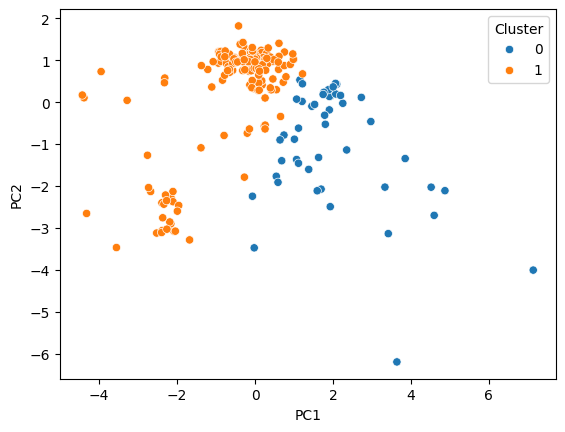

In [156]:
import seaborn as sns
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca)
plt.show()